# Measure of "bestness" -- Blood Lead Levels

In [46]:
import pandas as pd
import geopandas as gpd
import numpy as np

%matplotlib inline

## Importing data

In [47]:
bloodlvl = pd.read_csv('schooldistrict2015_2018.csv',
                           index_col="School District", 
                           parse_dates=True)
s = pd.DataFrame(bloodlvl)

s.head()

,Rate 2018 (% elevated),Rate 2017 (% elevated),Rate 2016 (% elevated),Rate 2015 (% elevated)
School District,,,,
Allegheny Valley,0.69,0.97,0.00,0.00
Avonworth,1.00,0.63,0.81,0.72
Baldwin-Whitehall,1.45,1.43,0.76,1.36
Bethel Park,0.19,0.63,0.00,0.49
Brentwood Borough,2.76,3.14,1.42,2.20


We'll drop out the previous years and only look at the most recent data.

In [49]:
del s['Rate 2015 (% elevated)']
del s['Rate 2016 (% elevated)']
del s['Rate 2017 (% elevated)']

Next, we'll rename the column to something a little more consice and readable, and then we'll reprint the data with only that one column to simplify it a bit.

In [52]:
# renaming column to make it prettier
s = s.rename(columns={'Rate 2018 (% elevated)':'Blood Lead Elevation'})

# reprinting with only our most recent column still in the dataframe
s.head()

,Blood Lead Elevation
School District,
Allegheny Valley,0.69
Avonworth,1.00
Baldwin-Whitehall,1.45
Bethel Park,0.19
Brentwood Borough,2.76


## Sorting Data

The focus of the project is to measure neighborhood 'bestness', so what I'm doing here is sorting the data by who has the **least** blood lead levels in terms of elevation in their school districts -- this seems to me to be a pretty good measure of which neighborhoods have the healthiest citizens in this respect. We're also going to filter out results higher than 0.7% so that the neighborhoods play nicely with the bar graph.

In [60]:
# sorting the data in ascending order to show the highest levels of blood lead

blood_levels = s[s['Blood Lead Elevation']<0.7].sort_values('Blood Lead Elevation',ascending=True)

blood_levels.head(10)

,Blood Lead Elevation
School District,
Deer Lakes,0.00
Fort Cherry,0.00
Hampton Township,0.00
South Park,0.00
South Allegheny,0.00
Plum Borough,0.00
Pine-Richland,0.00
Bethel Park,0.19
West Jefferson Hills,0.22


## Representation

We're going to set up the previously mentioned bar graph and display our data, which will show the neighborhoods with the best results (remember, lower is better).

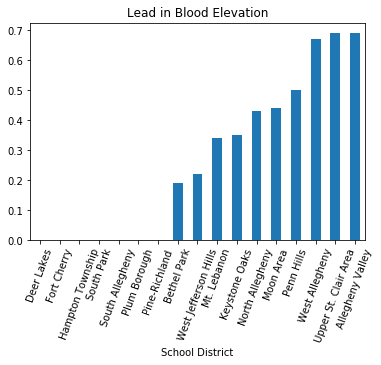

In [63]:
# setting up bar graph
blood_levels.loc[:,'Blood Lead Elevation'].plot(kind="bar", title = "Lead in Blood Elevation", rot=70)